In [24]:
import numpy as np
import matplotlib.pyplot as plt
from pydicom.data import get_testdata_file
from pydicom import dcmread
import cv2
import pydicom
import os





class modificarImg:

    def rotate(self,img, angle=0, rotPoint=None):
        while True:
            try:
                angle_input = input('''Seleccione el ángulo que desea rotar la imagen:\n
                            1. Rotar 90°\n
                            2. Rotar 180°\n
                            3. Rotar 270°\n''')
                angle = int(angle_input)
                if angle == 1:
                    angle = 90
                    break
                elif angle == 2:
                    angle = 180
                    break
                elif angle == 3:
                    angle = 270
                    break
                else:
                    print("La opción que eligió no es válida")
            except ValueError:
                print("Ingrese un número válido.")
        
        (height,width) = img.shape[:2]

        if rotPoint is None:
            rotPoint = (width//2,height//2)
        
        rotMat = cv2.getRotationMatrix2D(rotPoint, angle, 1.0)
        dimensions = (width,height)

        return cv2.warpAffine(img, rotMat, dimensions)
    
    def graficar(self,img,rotated):
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title("Dicom")

        plt.subplot(1, 2, 2)
        plt.imshow(rotated)
        plt.title("Dicom Rotado")

        plt.show()
    
    def guardar_img_rotada(self,imagen_rotada,ruta_original,ruta_final):
        ds = pydicom.dcmread(ruta_original)
        ds.Rows, ds.Columns = imagen_rotada.shape
        ds.PixelData = imagen_rotada.tobytes()
        ds.save_as(ruta_final)


    def binarizar(self,ruta):
        #Leer la imagen
        img0=cv2.imread(ruta)
        
        #Imagen binarisada 
        imgb=cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
        #plt.imshow(imgb, cmap='gray', vmin=0, vmax=255)
        #Transformacion morfologica 
        umb,imgB=cv2.threshold(imgb,20,250,cv2.THRESH_BINARY)
        return imgb,imgB

    def graficar_binarizada(self,img1,img2):
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
        plt.subplot(1,2,2)
        plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

        plt.show()

    def transformacion(self,binarizada):
        #Kernel
        K1=int(input(f"Ingrese el primer valor del Kernel:  "))
        K2=int(input(f"Ingrese el segundo valor del Kernel:  "))
        kernel = np.ones((K1,K2),np.uint8)
        imaOp2=cv2.morphologyEx(binarizada, cv2.MORPH_OPEN, kernel, iterations = 3)

        return imaOp2,K1,K2
    
    def texto(self,img,K1,K2):
        print(img.shape)
        text = f"Imagen transformada\nUmbral usado: 20\nKernel usado:{K1},{K2}"
        imgTexto = cv2.putText(img, text, (0,100), cv2.FONT_HERSHEY_TRIPLEX, 1.0, (255,255,255), 2)


        return imgTexto

        #putText(imagen,texto,(de dónde), fuente, escala, color, grueso)
        



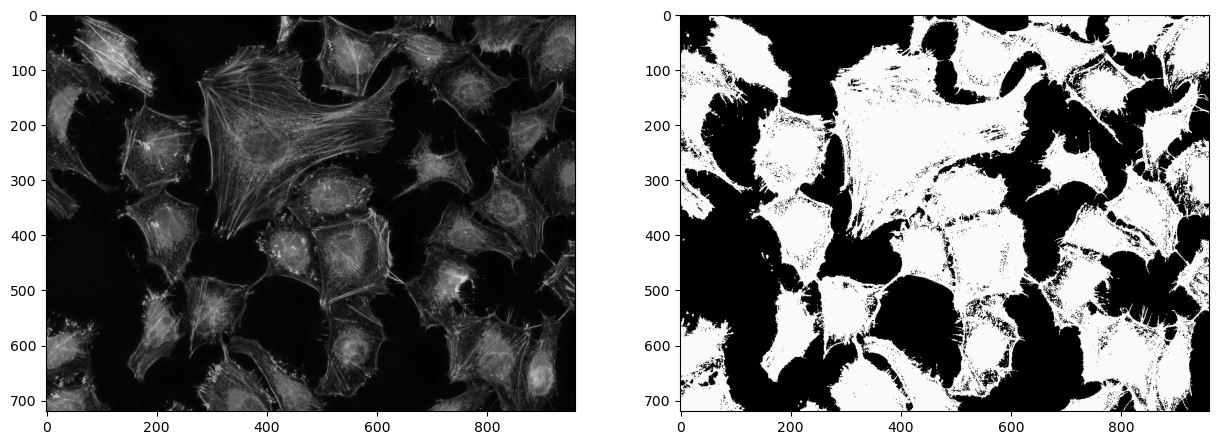

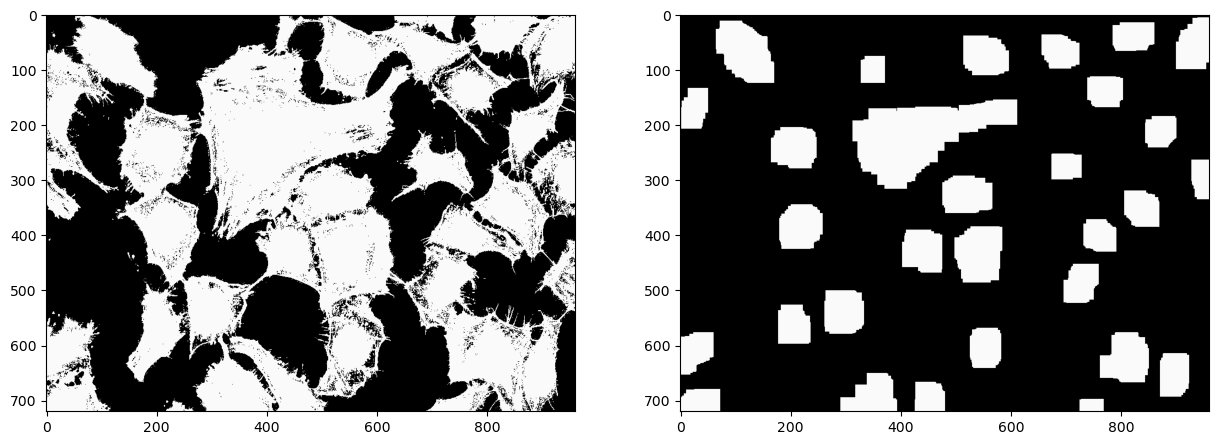

(720, 960)


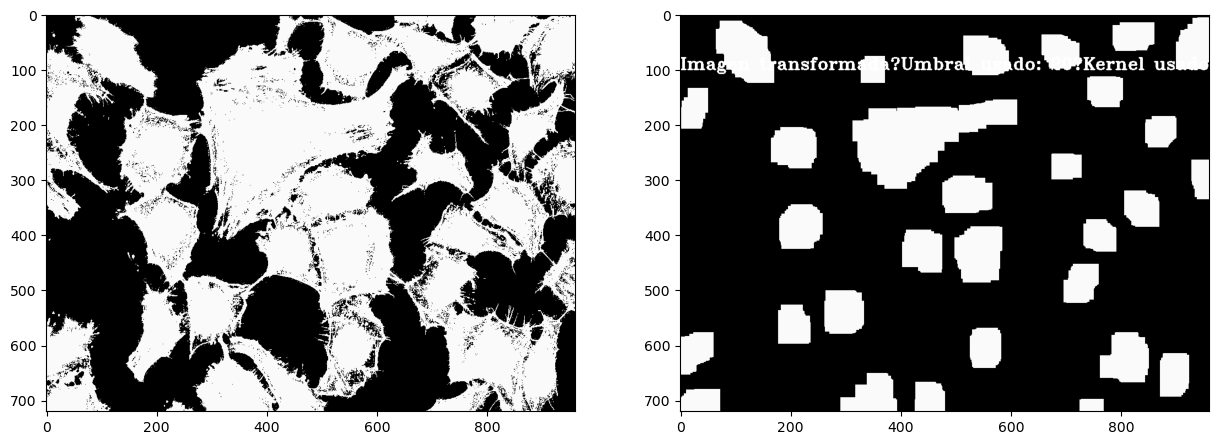

'"\nruta_original = input("Ingrese la ruta de la imagen DICOM original: ")\nruta_final = input("Ingrese la ruta donde desea guardar la imagen DICOM rotada: ")\n\n\nds = pydicom.dcmread(ruta_original)\n\nimg = ds.pixel_array\n\nrotated = modificarImg.rotate(img, 45)\n\nmodificarImg.graficar(img,rotated)\n\nmodificarImg.guardar_img_rotada(rotated, ruta_original, ruta_final)\n\n#mostrar imagenes matplot\nplt.figure()\nplt.subplot(1, 2, 1)\nplt.imshow(img)\nplt.title("Dicom")\n\nplt.subplot(1, 2, 2)\nplt.imshow(rotated)\nplt.title("Dicom Rotado")\n\nplt.show()\n    '

In [25]:
modificarImg = modificarImg()

ruta=input("Ingrese la ruta de la imágen jpg o png: ")
a,b=modificarImg.binarizar(ruta)
modificarImg.graficar_binarizada(a,b)
c,K1,K2 = modificarImg.transformacion(b)
modificarImg.graficar_binarizada(b,c)
d = modificarImg.texto(c,K1,K2)
modificarImg.graficar_binarizada(b,d)

# Rutas de archivo
""""
ruta_original = input("Ingrese la ruta de la imagen DICOM original: ")
ruta_final = input("Ingrese la ruta donde desea guardar la imagen DICOM rotada: ")


ds = pydicom.dcmread(ruta_original)

img = ds.pixel_array

rotated = modificarImg.rotate(img, 45)

modificarImg.graficar(img,rotated)

modificarImg.guardar_img_rotada(rotated, ruta_original, ruta_final)

#mostrar imagenes matplot
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Dicom")

plt.subplot(1, 2, 2)
plt.imshow(rotated)
plt.title("Dicom Rotado")

plt.show()
    """